In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
df_test = pd.read_csv("/content/test.csv")

In [98]:
df_train = pd.read_csv("/content/train.csv")

In [99]:
df_test.head ()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [100]:
df_train.head ()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [101]:
df_test.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [102]:
df_test.rename(columns={'Employee ID': 'Çalışan ID',
                   'Age' : 'Yaş',
                   'Gender' : 'Cinsiyet',
                   'Years at Company' : 'Şirkette Çalışma Yılı' ,
                   'Job Role' : 'İş Rolü',
                   'Monthly Income' : 'Aylık Kazanç',
                   'Work-Life Balance' : 'İş-Hayat Dengesi',
                   'Job Satisfaction' : 'İş Memnuniyeti',
                   'Performance Rating' : 'Performans Derecelendirmesi' ,
                   'Number of Promotions' : 'Terfi Sayısı' ,
                   'Overtime' : 'Mesai' ,
                   'Distance from Home' : 'Evden Uzaklık' ,
                   'Education Level' : 'Eğitim Seviyesi' ,
                   'Marital Status' : 'Medeni Durum' ,
                   'Number of Dependents' : 'Bağımlı Sayısı' ,
                   'Job Level' : 'İş Seviyesi' ,
                   'Company Size' : 'Şirket Büyüklüğü' ,
                   'Company Tenure' : 'Şirket Görev Süresi' ,
                   'Remote Work' : 'Uzaktan Çalışma' ,
                   'Leadership Opportunities' : 'Liderlik Fırsatları' ,
                   'Innovation Opportunities' :  'İnovasyon Fırsatları' ,
                   'Company Reputation' : 'Şirket İtibarı' ,
                   'Employee Recognition' : 'Çalışan Tanınması' ,
                   'Attrition' : 'Yıpranma'} ,
                   inplace=True)

In [103]:
df_test.head ()

,Çalışan ID,Yaş,Cinsiyet,Şirkette Çalışma Yılı,İş Rolü,Aylık Kazanç,İş-Hayat Dengesi,İş Memnuniyeti,Performans Derecelendirmesi,Terfi Sayısı,...,Bağımlı Sayısı,İş Seviyesi,Şirket Büyüklüğü,Şirket Görev Süresi,Uzaktan Çalışma,Liderlik Fırsatları,İnovasyon Fırsatları,Şirket İtibarı,Çalışan Tanınması,Yıpranma
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [104]:
df_train.rename(columns={'Employee ID': 'Çalışan ID',
                   'Age' : 'Yaş',
                   'Gender' : 'Cinsiyet',
                   'Years at Company' : 'Şirkette Çalışma Yılı' ,
                   'Job Role' : 'İş Rolü',
                   'Monthly Income' : 'Aylık Kazanç',
                   'Work-Life Balance' : 'İş-Hayat Dengesi',
                   'Job Satisfaction' : 'İş Memnuniyeti',
                   'Performance Rating' : 'Performans Derecelendirmesi' ,
                   'Number of Promotions' : 'Terfi Sayısı' ,
                   'Overtime' : 'Mesai' ,
                   'Distance from Home' : 'Evden Uzaklık' ,
                   'Education Level' : 'Eğitim Seviyesi' ,
                   'Marital Status' : 'Medeni Durum' ,
                   'Number of Dependents' : 'Bağımlı Sayısı' ,
                   'Job Level' : 'İş Seviyesi' ,
                   'Company Size' : 'Şirket Büyüklüğü' ,
                   'Company Tenure' : 'Şirket Görev Süresi' ,
                   'Remote Work' : 'Uzaktan Çalışma' ,
                   'Leadership Opportunities' : 'Liderlik Fırsatları' ,
                   'Innovation Opportunities' :  'İnovasyon Fırsatları' ,
                   'Company Reputation' : 'Şirket İtibarı' ,
                   'Employee Recognition' : 'Çalışan Tanınması' ,
                   'Attrition' : 'Yıpranma'} ,
                   inplace=True)

In [105]:
df_train.head()

,Çalışan ID,Yaş,Cinsiyet,Şirkette Çalışma Yılı,İş Rolü,Aylık Kazanç,İş-Hayat Dengesi,İş Memnuniyeti,Performans Derecelendirmesi,Terfi Sayısı,...,Bağımlı Sayısı,İş Seviyesi,Şirket Büyüklüğü,Şirket Görev Süresi,Uzaktan Çalışma,Liderlik Fırsatları,İnovasyon Fırsatları,Şirket İtibarı,Çalışan Tanınması,Yıpranma
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [106]:
df_test.columns

Index(['Çalışan ID', 'Yaş', 'Cinsiyet', 'Şirkette Çalışma Yılı', 'İş Rolü',
       'Aylık Kazanç', 'İş-Hayat Dengesi', 'İş Memnuniyeti',
       'Performans Derecelendirmesi', 'Terfi Sayısı', 'Mesai', 'Evden Uzaklık',
       'Eğitim Seviyesi', 'Medeni Durum', 'Bağımlı Sayısı', 'İş Seviyesi',
       'Şirket Büyüklüğü', 'Şirket Görev Süresi', 'Uzaktan Çalışma',
       'Liderlik Fırsatları', 'İnovasyon Fırsatları', 'Şirket İtibarı',
       'Çalışan Tanınması', 'Yıpranma'],
      dtype='object')

In [107]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Çalışan ID                   14900 non-null  int64 
 1   Yaş                          14900 non-null  int64 
 2   Cinsiyet                     14900 non-null  object
 3   Şirkette Çalışma Yılı        14900 non-null  int64 
 4   İş Rolü                      14900 non-null  object
 5   Aylık Kazanç                 14900 non-null  int64 
 6   İş-Hayat Dengesi             14900 non-null  object
 7   İş Memnuniyeti               14900 non-null  object
 8   Performans Derecelendirmesi  14900 non-null  object
 9   Terfi Sayısı                 14900 non-null  int64 
 10  Mesai                        14900 non-null  object
 11  Evden Uzaklık                14900 non-null  int64 
 12  Eğitim Seviyesi              14900 non-null  object
 13  Medeni Durum                 14

In [108]:
#sayısal veri içere sütunlar
numerical_cols = df_test.select_dtypes(include=np.number).columns
df_test[numerical_cols]

,Çalışan ID,Yaş,Şirkette Çalışma Yılı,Aylık Kazanç,Terfi Sayısı,Evden Uzaklık,Bağımlı Sayısı,Şirket Görev Süresi
0,52685,36,13,8029,1,83,1,22
1,30585,35,7,4563,1,55,4,27
2,54656,50,7,5583,3,14,2,76
3,33442,58,44,5525,0,43,4,96
4,15667,39,24,4604,0,47,6,45
...,...,...,...,...,...,...,...,...
14895,16243,56,42,7830,0,40,0,60
14896,47175,30,15,3856,2,45,0,20
14897,12409,52,5,5654,0,4,4,7
14898,9554,18,4,5276,0,13,3,5


In [109]:
print(df_test.describe()) #sayısal verilerin istatistikleri

         Çalışan ID           Yaş  Şirkette Çalışma Yılı  Aylık Kazanç  \
count  14900.000000  14900.000000           14900.000000  14900.000000   
mean   37339.022081     38.385235              15.592416   7287.306040   
std    21453.129293     12.097904              11.133792   2156.737934   
min        5.000000     18.000000               1.000000   1226.000000   
25%    18825.500000     28.000000               7.000000   5633.750000   
50%    37433.000000     38.000000              13.000000   7332.000000   
75%    55857.500000     49.000000              23.000000   8852.000000   
max    74471.000000     59.000000              51.000000  15063.000000   

       Terfi Sayısı  Evden Uzaklık  Bağımlı Sayısı  Şirket Görev Süresi  
count  14900.000000   14900.000000    14900.000000         14900.000000  
mean       0.834362      49.927315        1.659329            55.603624  
std        0.996511      28.702307        1.545401            25.352807  
min        0.000000       1.000000   

In [110]:
print(df_test.isnull().sum()) # boş hücre kontrol

Çalışan ID                     0
Yaş                            0
Cinsiyet                       0
Şirkette Çalışma Yılı          0
İş Rolü                        0
Aylık Kazanç                   0
İş-Hayat Dengesi               0
İş Memnuniyeti                 0
Performans Derecelendirmesi    0
Terfi Sayısı                   0
Mesai                          0
Evden Uzaklık                  0
Eğitim Seviyesi                0
Medeni Durum                   0
Bağımlı Sayısı                 0
İş Seviyesi                    0
Şirket Büyüklüğü               0
Şirket Görev Süresi            0
Uzaktan Çalışma                0
Liderlik Fırsatları            0
İnovasyon Fırsatları           0
Şirket İtibarı                 0
Çalışan Tanınması              0
Yıpranma                       0
dtype: int64


In [111]:
# train verisi inceleme
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Çalışan ID                   59598 non-null  int64 
 1   Yaş                          59598 non-null  int64 
 2   Cinsiyet                     59598 non-null  object
 3   Şirkette Çalışma Yılı        59598 non-null  int64 
 4   İş Rolü                      59598 non-null  object
 5   Aylık Kazanç                 59598 non-null  int64 
 6   İş-Hayat Dengesi             59598 non-null  object
 7   İş Memnuniyeti               59598 non-null  object
 8   Performans Derecelendirmesi  59598 non-null  object
 9   Terfi Sayısı                 59598 non-null  int64 
 10  Mesai                        59598 non-null  object
 11  Evden Uzaklık                59598 non-null  int64 
 12  Eğitim Seviyesi              59598 non-null  object
 13  Medeni Durum                 59

In [112]:
print(df_train.describe()) # train verisi istatistikleri

         Çalışan ID           Yaş  Şirkette Çalışma Yılı  Aylık Kazanç  \
count  59598.000000  59598.000000           59598.000000  59598.000000   
mean   37227.118729     38.565875              15.753901   7302.397983   
std    21519.150028     12.079673              11.245981   2151.457423   
min        1.000000     18.000000               1.000000   1316.000000   
25%    18580.250000     28.000000               7.000000   5658.000000   
50%    37209.500000     39.000000              13.000000   7354.000000   
75%    55876.750000     49.000000              23.000000   8880.000000   
max    74498.000000     59.000000              51.000000  16149.000000   

       Terfi Sayısı  Evden Uzaklık  Bağımlı Sayısı  Şirket Görev Süresi  
count  59598.000000   59598.000000    59598.000000         59598.000000  
mean       0.832578      50.007651        1.648075            55.758415  
std        0.994991      28.466459        1.555689            25.411090  
min        0.000000       1.000000   

In [113]:
print(df_train.isnull().sum())  # Eksik değer kontrolü

Çalışan ID                     0
Yaş                            0
Cinsiyet                       0
Şirkette Çalışma Yılı          0
İş Rolü                        0
Aylık Kazanç                   0
İş-Hayat Dengesi               0
İş Memnuniyeti                 0
Performans Derecelendirmesi    0
Terfi Sayısı                   0
Mesai                          0
Evden Uzaklık                  0
Eğitim Seviyesi                0
Medeni Durum                   0
Bağımlı Sayısı                 0
İş Seviyesi                    0
Şirket Büyüklüğü               0
Şirket Görev Süresi            0
Uzaktan Çalışma                0
Liderlik Fırsatları            0
İnovasyon Fırsatları           0
Şirket İtibarı                 0
Çalışan Tanınması              0
Yıpranma                       0
dtype: int64


In [114]:
df_train["İş-Hayat Dengesi"].unique() # kaş farklı iş hayat dengesi değeri var


array(['Excellent', 'Poor', 'Good', 'Fair'], dtype=object)

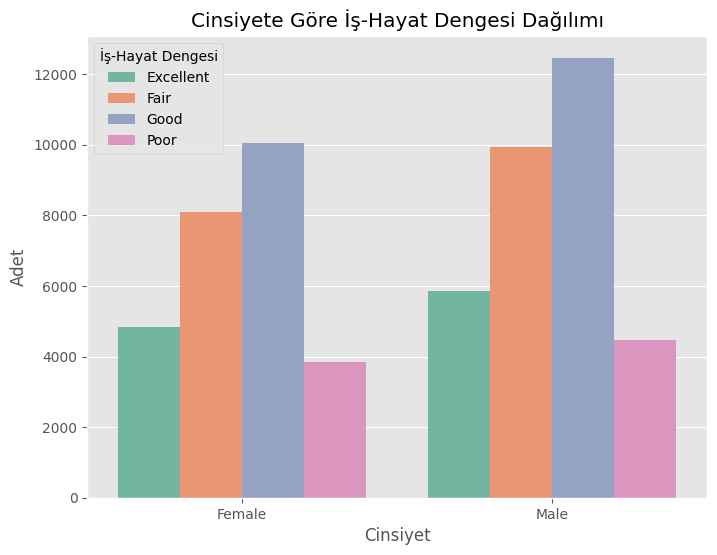

In [115]:
# cinsiyete göre iş hayat dengesi analizi

is_yasam_dengesi = df_train.groupby(['Cinsiyet', 'İş-Hayat Dengesi']).size().reset_index(name='Adet')

plt.figure(figsize=(8, 6))
sns.barplot(x='Cinsiyet', y='Adet', hue='İş-Hayat Dengesi', data=is_yasam_dengesi, palette='Set2')

plt.title('Cinsiyete Göre İş-Hayat Dengesi Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Adet')
plt.legend(title='İş-Hayat Dengesi')
plt.show()

In [116]:
df_train["Yıpranma"].unique() # kaç farklı yıpranma değeri var

array(['Stayed', 'Left'], dtype=object)

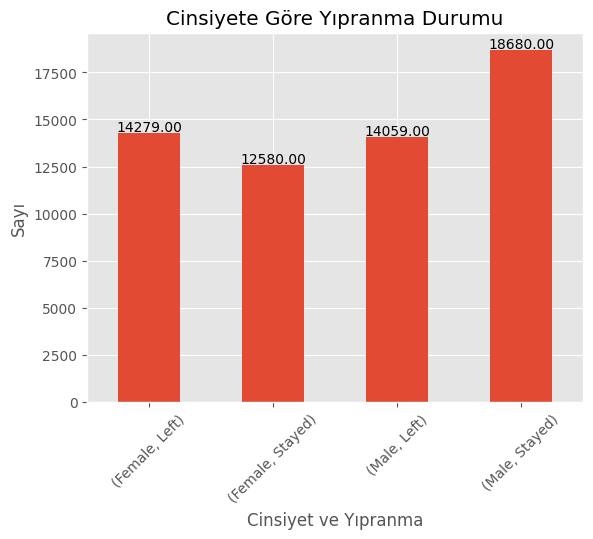

In [117]:
#yıpranma değerlerinin cinsiyetlere göre ayrılması
yipranma_cinsiyet = df_train.groupby(['Cinsiyet', 'Yıpranma']).size()
yipranma_cinsiyet.plot(kind='bar')
plt.title('Cinsiyete Göre Yıpranma Durumu')
plt.xlabel('Cinsiyet ve Yıpranma')
plt.ylabel('Sayı')
plt.xticks(rotation=45)

for index, value in enumerate(yipranma_cinsiyet.values):
    plt.text(index, value + 100, f'{value:.2f}', ha='center')
plt.show()

In [118]:
# terfi sütunundaki min ve max değer
min_value = df_train['Terfi Sayısı'].min()
print(f"Terfi Sayısı sütunundaki minimum değer: {min_value}")

max_value = df_train['Terfi Sayısı'].max()
print(f"Terfi Sayısı sütunundaki maksimum değer: {max_value}")

Terfi Sayısı sütunundaki minimum değer: 0
Terfi Sayısı sütunundaki maksimum değer: 4


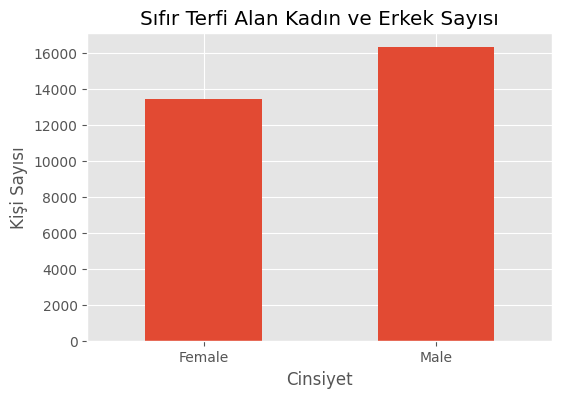

In [119]:
#0 adet terfi alan (hiç terfi almayan) kadın ve erkeklerin bar grafiği

zero_promotions = df_train[df_train['Terfi Sayısı'] == 0]
zero_promotions_gender = zero_promotions.groupby('Cinsiyet').size()

plt.figure(figsize=(6, 4))
zero_promotions_gender.plot(kind='bar')
plt.title('Sıfır Terfi Alan Kadın ve Erkek Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)

plt.show()

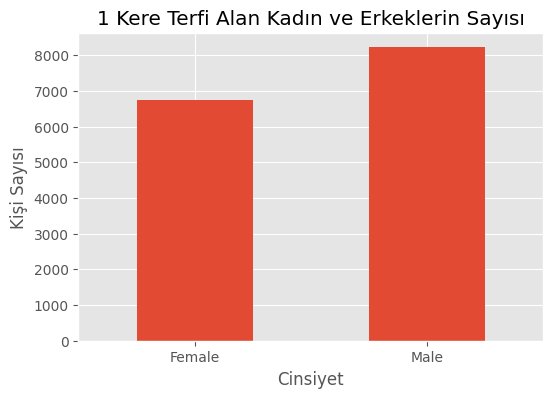

In [120]:
# 1 kere terfi alanların cinsiyete göre ayrılımı

one_promotion = df_train[df_train['Terfi Sayısı'] == 1]
one_promotion_gender = one_promotion.groupby('Cinsiyet').size()

plt.figure(figsize=(6, 4))
one_promotion_gender.plot(kind='bar')
plt.title('1 Kere Terfi Alan Kadın ve Erkeklerin Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)

plt.show()

Cinsiyet
Female    4848
Male      6036
dtype: int64


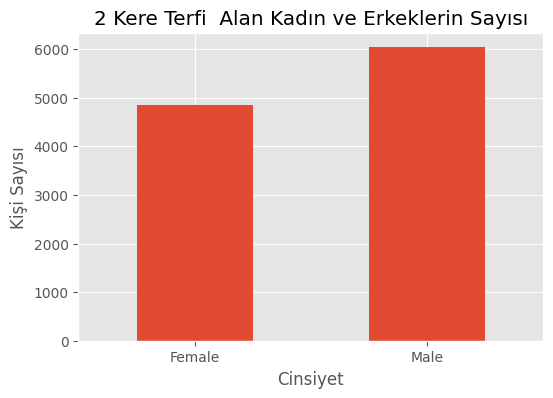

In [121]:
# 2 kere terfi alanların cinsiyete göre ayrılımı

two_promotions = df_train[df_train['Terfi Sayısı'] == 2]
two_promotions_gender = two_promotions.groupby('Cinsiyet').size()
print(two_promotions_gender)

plt.figure(figsize=(6, 4))
two_promotions_gender.plot(kind='bar')
plt.title('2 Kere Terfi  Alan Kadın ve Erkeklerin Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)

plt.show()

Cinsiyet
Female    1506
Male      1739
dtype: int64


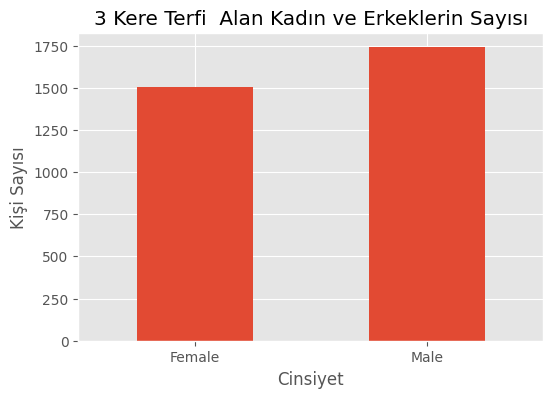

In [122]:
# 3 kere terfi alanların cinsiyete göre ayrılımı

three_promotions = df_train[df_train['Terfi Sayısı'] == 3]
three_promotions_gender = three_promotions.groupby('Cinsiyet').size()
print(three_promotions_gender)

plt.figure(figsize=(6, 4))
three_promotions_gender.plot(kind='bar')
plt.title('3 Kere Terfi  Alan Kadın ve Erkeklerin Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)

plt.show()

Cinsiyet
Female    344
Male      444
dtype: int64


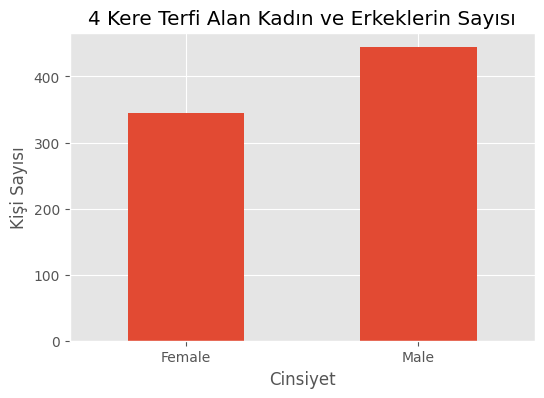

In [123]:
# 4 kere terfi alanların cinsiyete göre ayrılımı

four_promotions = df_train[df_train['Terfi Sayısı'] == 4]
four_promotions_gender = four_promotions.groupby('Cinsiyet').size()
print(four_promotions_gender)

plt.figure(figsize=(6, 4))
four_promotions_gender.plot(kind='bar')
plt.title('4 Kere Terfi Alan Kadın ve Erkeklerin Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)

plt.show()

In [124]:
#kaç adet iş rolü var
unique_job_roles = df_train['İş Rolü'].unique()
print(unique_job_roles)

num_unique_job_roles = len(unique_job_roles)
print(f"\n Farklı iş rolü sayısı: {num_unique_job_roles}")

['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

 Farklı iş rolü sayısı: 5


Cinsiyet    Female  Male
İş Rolü                 
Education     5506  6984
Finance       3746  4639
Healthcare    6154  7488
Media         4379  5195
Technology    7074  8433


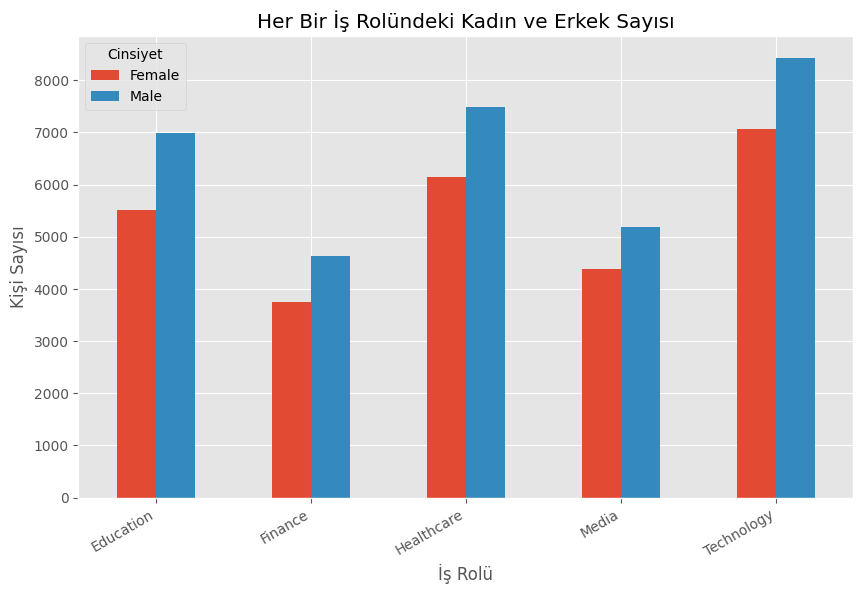

In [125]:
# Her bir iş rolündeki kadın ve erkek sayısı
job_role_gender = df_train.groupby(['İş Rolü', 'Cinsiyet']).size().unstack(fill_value=0)
print (job_role_gender)

job_role_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Her Bir İş Rolündeki Kadın ve Erkek Sayısı')
plt.xlabel('İş Rolü')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Cinsiyet')


plt.show()

In [126]:
#aylık kazanç minimum ve maksimum değer

min_monthly_income = df_train['Aylık Kazanç'].min()
max_monthly_income = df_train['Aylık Kazanç'].max()

print(f"Aylık Kazanç minimum değer: {min_monthly_income}")
print(f"Aylık Kazanç maksimum değer: {max_monthly_income}")

Aylık Kazanç minimum değer: 1316
Aylık Kazanç maksimum değer: 16149


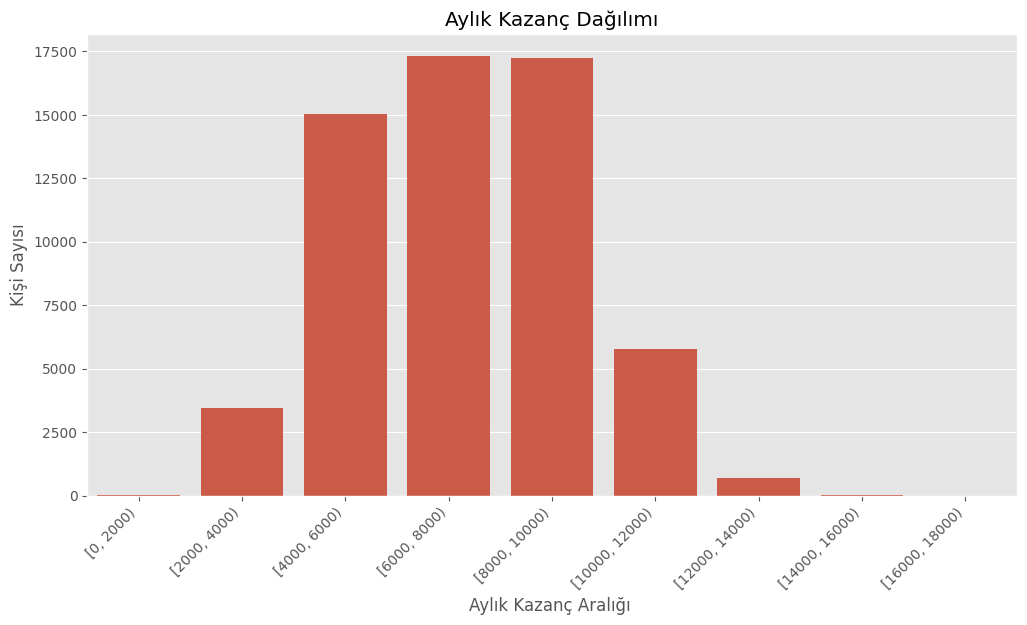

In [127]:
#aylık kazançların sıfırdan max değere kadar, 2000 lik aralıklarla ayrılması
bins = np.arange(0, df_train['Aylık Kazanç'].max() + 2000, 2000)
df_train['Aylık Kazanç Kategorisi'] = pd.cut(df_train['Aylık Kazanç'], bins=bins, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='Aylık Kazanç Kategorisi', data=df_train)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aylık Kazanç Aralığı ')
plt.ylabel('Kişi Sayısı')
plt.title('Aylık Kazanç Dağılımı')
plt.show()

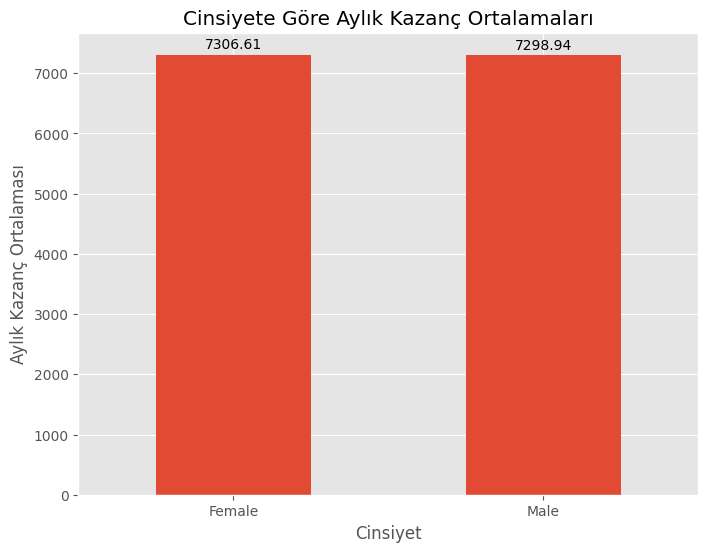

In [128]:
#Cinsiyete göre aylık kazanç ortalamaları
monthly_income_by_gender = df_train.groupby('Cinsiyet')['Aylık Kazanç'].mean()

plt.figure(figsize=(8, 6))
monthly_income_by_gender.plot(kind='bar')
plt.title('Cinsiyete Göre Aylık Kazanç Ortalamaları')
plt.xlabel('Cinsiyet')
plt.ylabel('Aylık Kazanç Ortalaması')
plt.xticks(rotation=0)

for index, value in enumerate(monthly_income_by_gender.values):
    plt.text(index, value + 100, f'{value:.2f}', ha='center')

plt.show()

<ipython-input-129-9267f7f07df2>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_salary = df_train.groupby('Age_Group')['Aylık Kazanç'].mean()


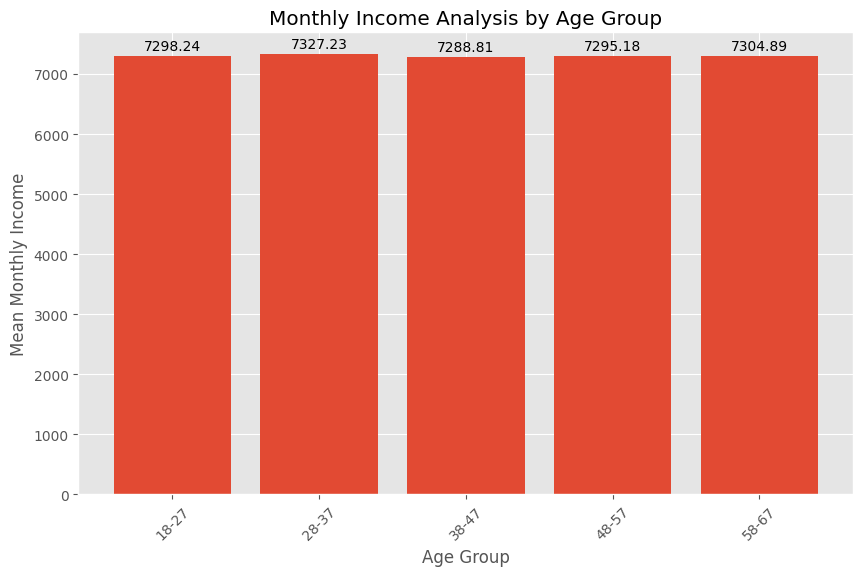

In [129]:
#10 ar 10 ar yaş aralığıyla maaş analizi

min_age = df_train['Yaş'].min()
max_age = df_train['Yaş'].max()

bins = range(min_age, max_age + 10, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_train['Age_Group'] = pd.cut(df_train['Yaş'], bins=bins, labels=labels, right=False)

age_group_salary = df_train.groupby('Age_Group')['Aylık Kazanç'].mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(age_group_salary.index, age_group_salary.values)
plt.xlabel("Age Group")
plt.ylabel("Mean Monthly Income")
plt.title("Monthly Income Analysis by Age Group")
plt.xticks(rotation=45)
for index, value in enumerate(age_group_salary.values):
    plt.text(index, value + 100, f'{value:.2f}', ha='center')
plt.show()

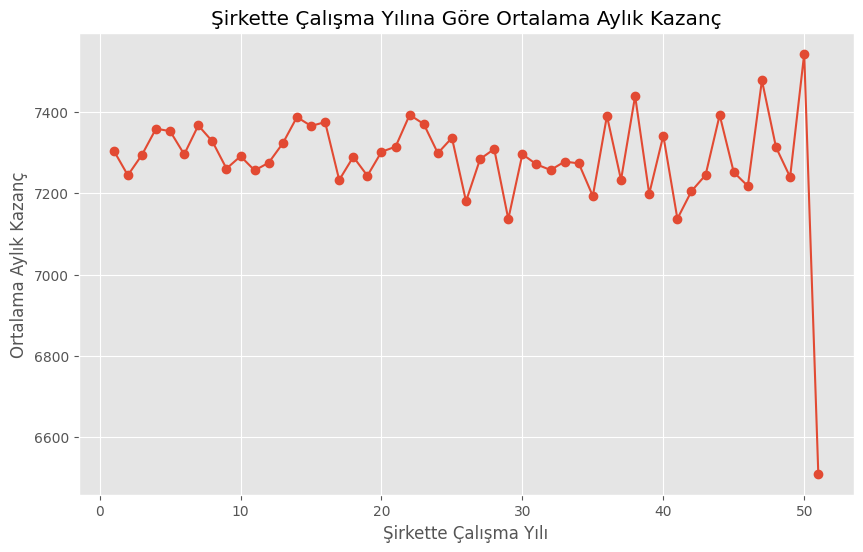

In [130]:
# Şirkette çalışma yılına göre aylık kazanç ortalaması
company_tenure_salary = df_train.groupby('Şirkette Çalışma Yılı')['Aylık Kazanç'].mean()

plt.figure(figsize=(10, 6))
plt.plot(company_tenure_salary.index, company_tenure_salary.values, marker='o')
plt.xlabel("Şirkette Çalışma Yılı")
plt.ylabel("Ortalama Aylık Kazanç")
plt.title("Şirkette Çalışma Yılına Göre Ortalama Aylık Kazanç")
plt.grid(True)
plt.show()

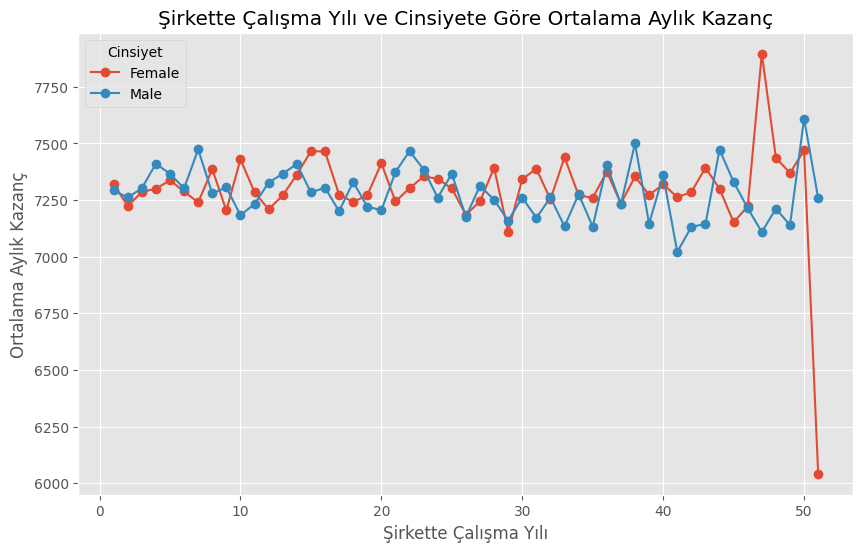

In [131]:
# Şirkette çalışma yılı ve cinsiyet arasındaki ilişkiye göre aylık kazanç ortalaması
company_tenure_gender_salary = df_train.groupby(['Şirkette Çalışma Yılı', 'Cinsiyet'])['Aylık Kazanç'].mean().unstack()

# Çalışma yılı ve cinsiyete göre maaş ortalamasını gösteren  çizgi grafiği
company_tenure_gender_salary.plot(figsize=(10, 6), marker='o')
plt.xlabel("Şirkette Çalışma Yılı")
plt.ylabel("Ortalama Aylık Kazanç")
plt.title("Şirkette Çalışma Yılı ve Cinsiyete Göre Ortalama Aylık Kazanç")
plt.legend(title="Cinsiyet")
plt.grid(True)
plt.show()

Cinsiyet       Female         Male
Mesai                             
No        7303.179159  7314.601213
Yes       7313.652702  7266.419094


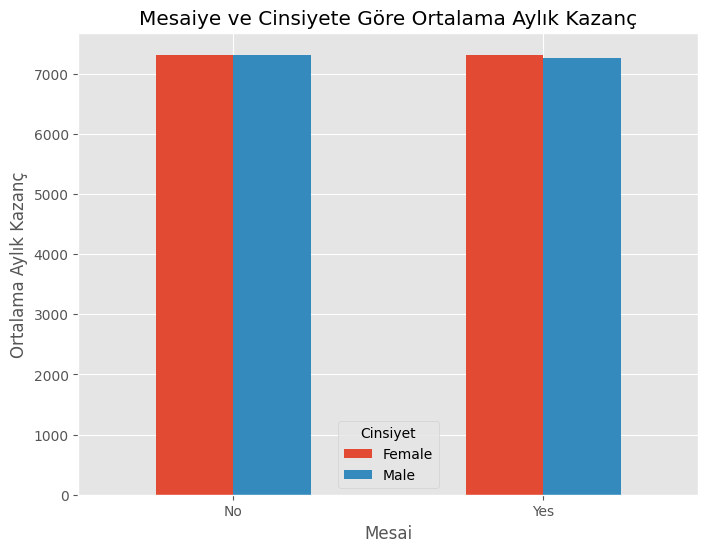

In [134]:
# Mesaiye göre aylık kazanç ortalaması
overtime_salary = df_train.groupby(['Mesai', 'Cinsiyet'])['Aylık Kazanç'].mean().unstack()
print(overtime_salary)

overtime_salary.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Mesai")
plt.ylabel("Ortalama Aylık Kazanç")
plt.title("Mesaiye ve Cinsiyete Göre Ortalama Aylık Kazanç")
plt.xticks(rotation=0)
plt.legend(title="Cinsiyet")
plt.show()

Cinsiyet         Female   Male
Uzaktan Çalışma               
No                21751  26488
Yes                5108   6251


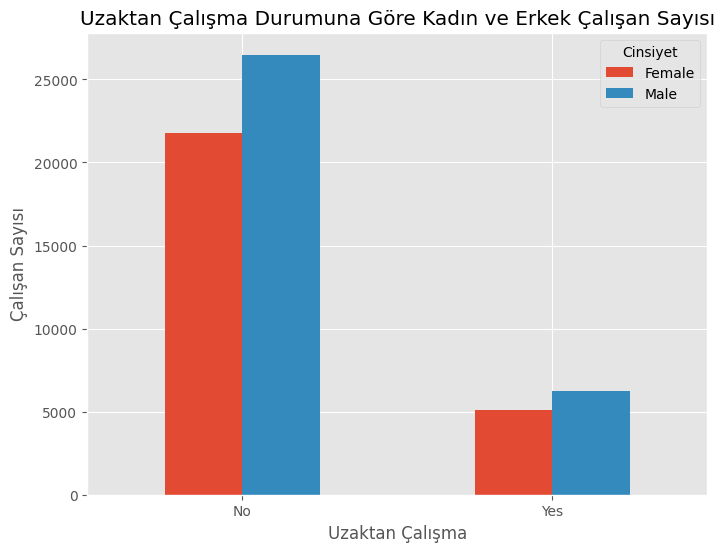

In [137]:
#uzaktan çalışan kişi sayısı
remote_work_gender = df_train.groupby(['Uzaktan Çalışma', 'Cinsiyet']).size().unstack(fill_value=0)
print(remote_work_gender)

remote_work_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Uzaktan Çalışma Durumuna Göre Kadın ve Erkek Çalışan Sayısı')
plt.xlabel('Uzaktan Çalışma')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=0)
plt.legend(title='Cinsiyet')
plt.show()

İş Memnuniyeti
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64


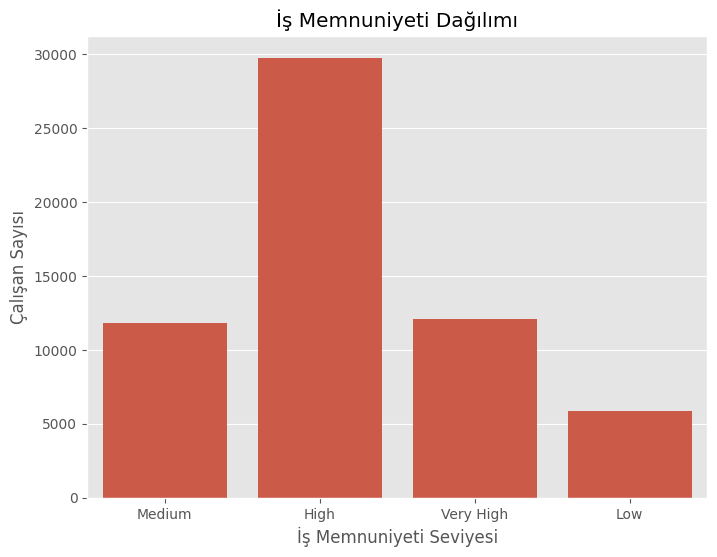

In [139]:
#iş memnuniyeti analizi
job_satisfaction_counts = df_train['İş Memnuniyeti'].value_counts()
print(job_satisfaction_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='İş Memnuniyeti', data=df_train)
plt.title('İş Memnuniyeti Dağılımı')
plt.xlabel('İş Memnuniyeti Seviyesi')
plt.ylabel('Çalışan Sayısı')
plt.show()

Yıpranma                      Left  Stayed
İş Rolü    Eğitim Seviyesi                
Education  Associate Degree   1483    1606
           Bachelor’s Degree  1922    1877
           High School        1213    1238
           Master’s Degree    1309    1222
           PhD                 158     462
Finance    Associate Degree    951    1120
           Bachelor’s Degree  1245    1251
           High School         795     859
           Master’s Degree     826     881
           PhD                 107     350
Healthcare Associate Degree   1729    1748
           Bachelor’s Degree  1943    2105
           High School        1298    1380
           Master’s Degree    1311    1422
           PhD                 173     533
Media      Associate Degree   1139    1206
           Bachelor’s Degree  1432    1407
           High School         899    1002
           Master’s Degree     942    1033
           PhD                 130     384
Technology Associate Degree   1928    2005
           

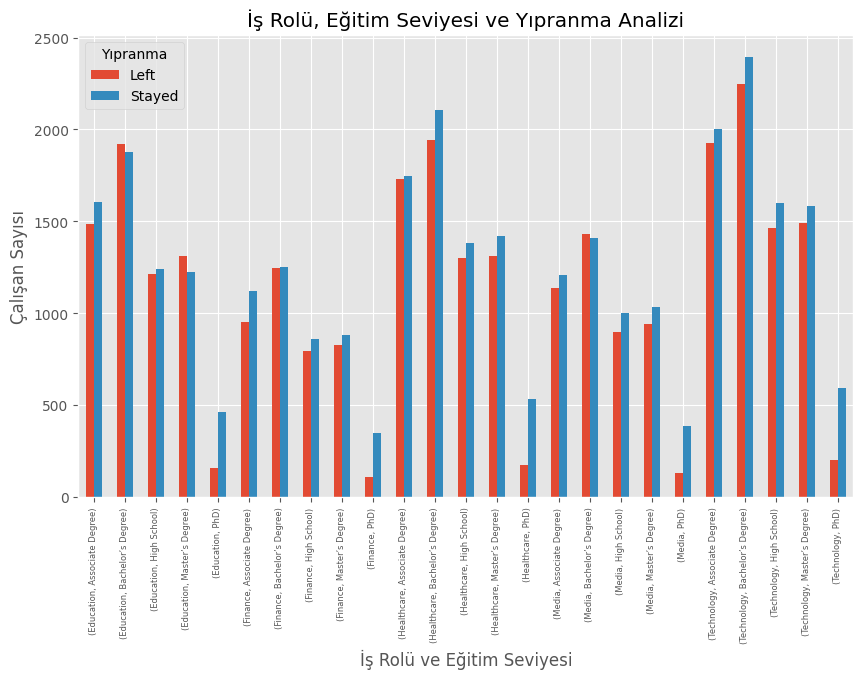

In [145]:
# İş rolü ve eğitim seviyesine göre yıpranma analizi
job_role_education_attrition = df_train.groupby(['İş Rolü', 'Eğitim Seviyesi', 'Yıpranma']).size().unstack(fill_value=0)
print(job_role_education_attrition)

job_role_education_attrition.plot(kind='bar', figsize=(10, 6))
plt.title('İş Rolü, Eğitim Seviyesi ve Yıpranma Analizi')
plt.xlabel('İş Rolü ve Eğitim Seviyesi')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=90, fontsize= 6)
plt.show()
